# Tutorial for assessing the riskiness of single assets

## Steps 

1. Import the needed libraries for the tutorial
2. Create the starting and ending periods with the Datetime library
3. Pull Apple's stock data remotely from Yahoo Finance for those specified periods
4. Check the daily returns of Apple's stock for those periods
5. Check the daily volatility of Apple's daily returns and convert it to percentage
6. Plot a histogram of Apple's daily returns to visualize the volatility
7. Extend the tutorial by pulling Adjusted Closing prices for Apple, Facebook and Tesla from Yahoo Finance
8. Check the daily returns of the three companies
9. Check the volatility of those daily returns
10. Visualise the volatility by means of a histogram with the returns of each asset stacked against each other
 

In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
# Specify starting and end periods with Datetime

start = datetime(2016,1,1)
end = datetime(2017,1,1)

In [4]:
# Get Apple's stock info

apple = web.DataReader('AAPL', data_source='yahoo', start=start, end=end)

In [5]:
# Check the data

apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,107.010002,107.029999,104.820000,105.260002,101.703697,40912300
2016-01-04,102.610001,105.370003,102.000000,105.349998,101.790649,67649400
2016-01-05,105.750000,105.849998,102.410004,102.709999,99.239845,55791000
2016-01-06,100.559998,102.370003,99.870003,100.699997,97.297760,68457400
2016-01-07,98.680000,100.129997,96.430000,96.449997,93.191338,81094400


In [6]:
# Slice the Adjusted Closing prices we need 

aapl_close = apple['Adj Close']
aapl_close.head()

Date
2015-12-31    101.703697
2016-01-04    101.790649
2016-01-05     99.239845
2016-01-06     97.297760
2016-01-07     93.191338
Name: Adj Close, dtype: float64

In [7]:
# Calculate daily returns 

daily_returns = aapl_close.pct_change()
daily_returns.head()

Date
2015-12-31         NaN
2016-01-04    0.000855
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042205
Name: Adj Close, dtype: float64

In [8]:
# Check the volatility of Apple's daily returns

daily_volatility = daily_returns.std()
daily_volatility

0.014701740405814236

In [9]:
# just making the float a bit human readable ;) 

print(str(round(daily_volatility, 5) * 100) + '%')

1.47%


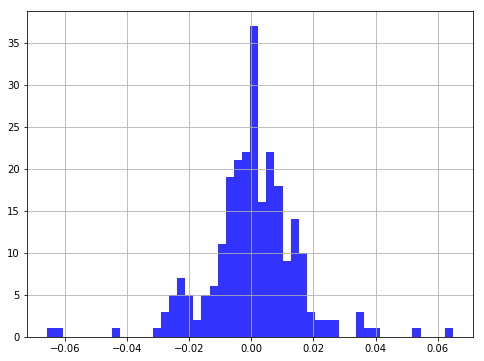

In [10]:
daily_returns.hist(bins=50, alpha=0.8, color='blue', figsize=(8,6));

In [11]:
# Let's have fun by comparing the volatility of three stocks. Pull Ajdusted closing prices for Apple, Fb and Tesla

assets = ['AAPL', 'FB', 'TSLA']

df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start=start, end=end)['Adj Close']
    
df.head()

,AAPL,FB,TSLA
Date,,,
2015-12-31,101.703697,104.660004,240.009995
2016-01-04,101.790649,102.220001,223.410004
2016-01-05,99.239845,102.730003,223.429993
2016-01-06,97.297760,102.970001,219.039993
2016-01-07,93.191338,97.919998,215.649994


In [12]:
# Check the daily returns of the three companies

asset_returns_daily = df.pct_change()
asset_returns_daily.head()

,AAPL,FB,TSLA
Date,,,
2015-12-31,NaN,NaN,NaN
2016-01-04,0.000855,-0.023314,-0.069164
2016-01-05,-0.025059,0.004989,0.000089
2016-01-06,-0.019570,0.002336,-0.019648
2016-01-07,-0.042205,-0.049043,-0.015477


In [13]:
# Check the volatility of the daily returns of the three companines

asset_volatility_daily = asset_returns_daily.std()
asset_volatility_daily

AAPL    0.014702
FB      0.017868
TSLA    0.024418
dtype: float64

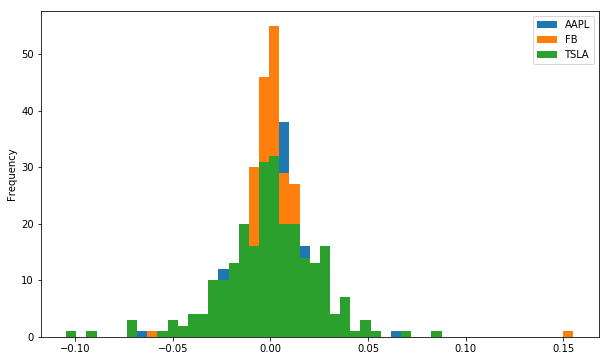

In [14]:
# Visualise the daily returns of the three companies stacked against each other. Notice the most/least volatile?

asset_returns_daily.plot.hist(bins=50, figsize=(10,6));

In [15]:
# As seen in the histogram, Tesla's daily returns are the most volatile with the biggest 'spreads'

asset_volatility_daily.max()

0.02441830434387891

In [16]:
# No surprise Apple's daily returns is the least volatile with such a small spread

asset_volatility_daily.min()

0.014701740405814231

# Go ahead and check the daily volatilities of stocks you find interesting